In [1]:
from datetime import datetime, timedelta, date
import pandas as pd
from constants import *
from download import query_phe as query, download_phe as download, find_latest, is_msoa_data_ready
from msoa_composite import check_path
from phe import plot_summary, read_csv, load_population, current_and_previous_data
from vaccination import vaccination_dashboard, vaccination_corrections
import requests

In [2]:
release=None

In [21]:
overview_data = query(
    filters={area_type: overview},
    structure=[release_timestamp, date_col, area_name, area_code,
               new_cases_by_specimen_date, new_admissions, new_deaths_by_death_date,
               new_virus_tests]
)
overview_data

,releaseTimestamp,date,areaName,areaCode,newCasesBySpecimenDate,newAdmissions,newDeaths28DaysByDeathDate,newVirusTests
0,2021-01-27,2021-01-26,United Kingdom,K02000001,3629,NaN,NaN,596845.0
1,2021-01-27,2021-01-25,United Kingdom,K02000001,22707,NaN,NaN,542893.0
2,2021-01-27,2021-01-24,United Kingdom,K02000001,16192,NaN,NaN,412204.0
3,2021-01-27,2021-01-23,United Kingdom,K02000001,21283,3082.0,NaN,484485.0
4,2021-01-27,2021-01-22,United Kingdom,K02000001,29280,3353.0,NaN,629416.0
...,...,...,...,...,...,...,...,...
358,2021-01-27,2020-02-03,United Kingdom,K02000001,0,NaN,NaN,NaN
359,2021-01-27,2020-02-02,United Kingdom,K02000001,0,NaN,NaN,NaN
360,2021-01-27,2020-02-01,United Kingdom,K02000001,1,NaN,NaN,NaN
361,2021-01-27,2020-01-31,United Kingdom,K02000001,1,NaN,NaN,NaN


In [22]:
download('england', 'nation', new_admissions_sum, new_cases_sum, new_deaths_sum, unique_people_tested_sum, area_name='England', release=release)

PosixPath('/Users/chris/coronavirus/data/england_2021-01-27.csv')

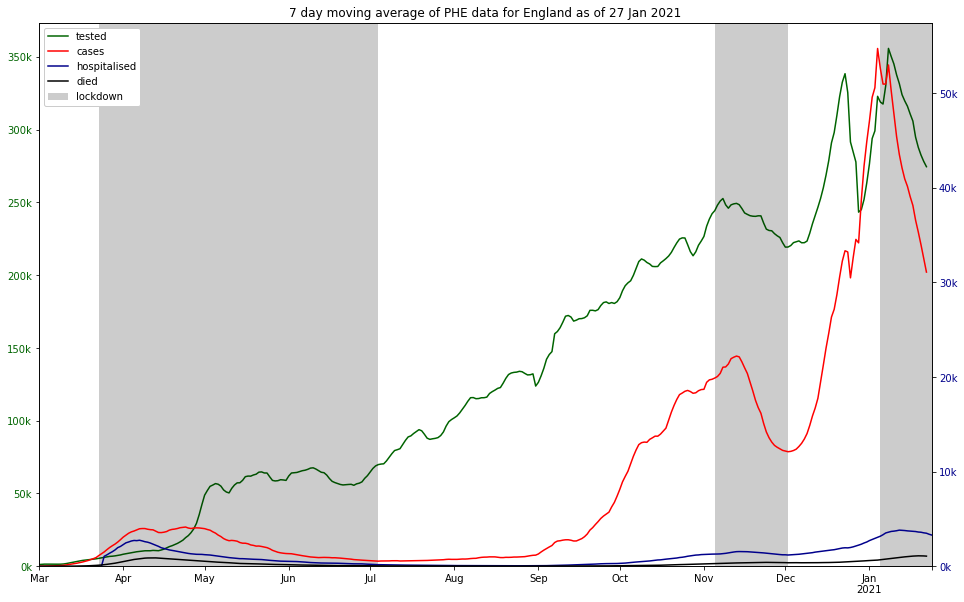

In [2]:
plot_summary(earliest_date='2020-03-01', tested_formatter=lambda y, pos: f"{y / 1_000:,.0f}k")

In [24]:
download('vaccination', 'nation', *vaccination_new_and_weekly, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_2021-01-27.csv')

In [25]:
download('vaccination_cum', 'nation', *vaccination_cumulative, release=release)

PosixPath('/Users/chris/coronavirus/data/vaccination_cum_2021-01-27.csv')

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,Northern Ireland,N92000002,23657.0,168140.0,144483.0,1893667,1.249269,7.629800,91.120931
1,Scotland,S92000003,6596.0,462092.0,455496.0,5463300,0.120733,8.337379,91.541889
2,Wales,W92000004,639.0,312305.0,311666.0,3152879,0.020267,9.885124,90.094609
3,England,E92000001,444011.0,6221850.0,5777839.0,56286961,0.788835,10.264969,88.946197


'7,164,387'

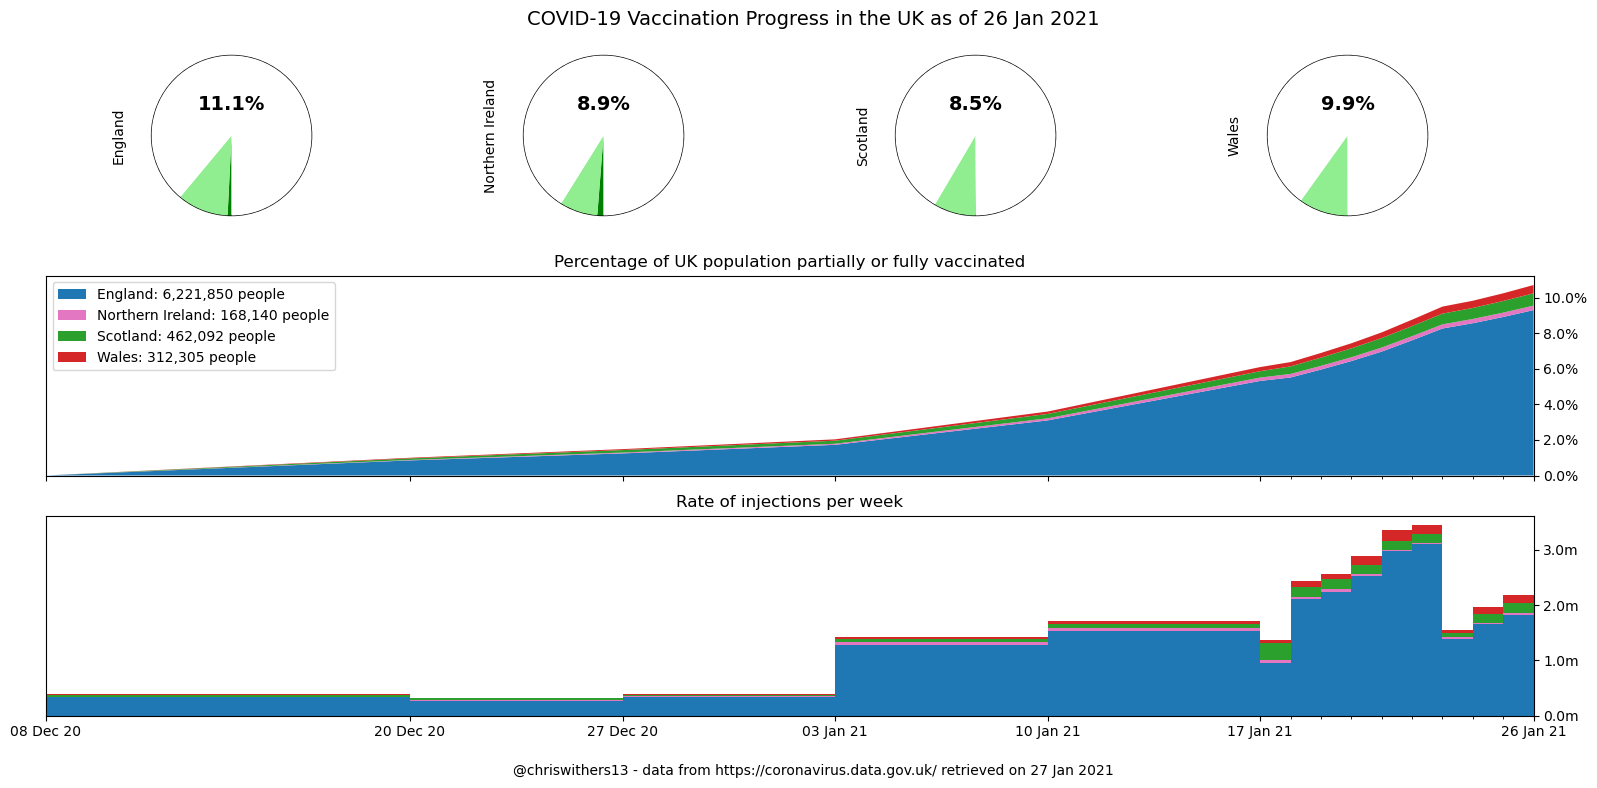

In [3]:
results = vaccination_dashboard()
display(results)
f"{results['any'].sum():,.0f}"

,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,Northern Ireland,N92000002,23657.0,168140.0,144483.0,1893667,1.249269,7.629800,91.120931
1,Scotland,S92000003,6596.0,462092.0,455496.0,5463300,0.120733,8.337379,91.541889
2,Wales,W92000004,639.0,312305.0,311666.0,3152879,0.020267,9.885124,90.094609
3,England,E92000001,444011.0,6221850.0,5777839.0,56286961,0.788835,10.264969,88.946197


'7,164,387'

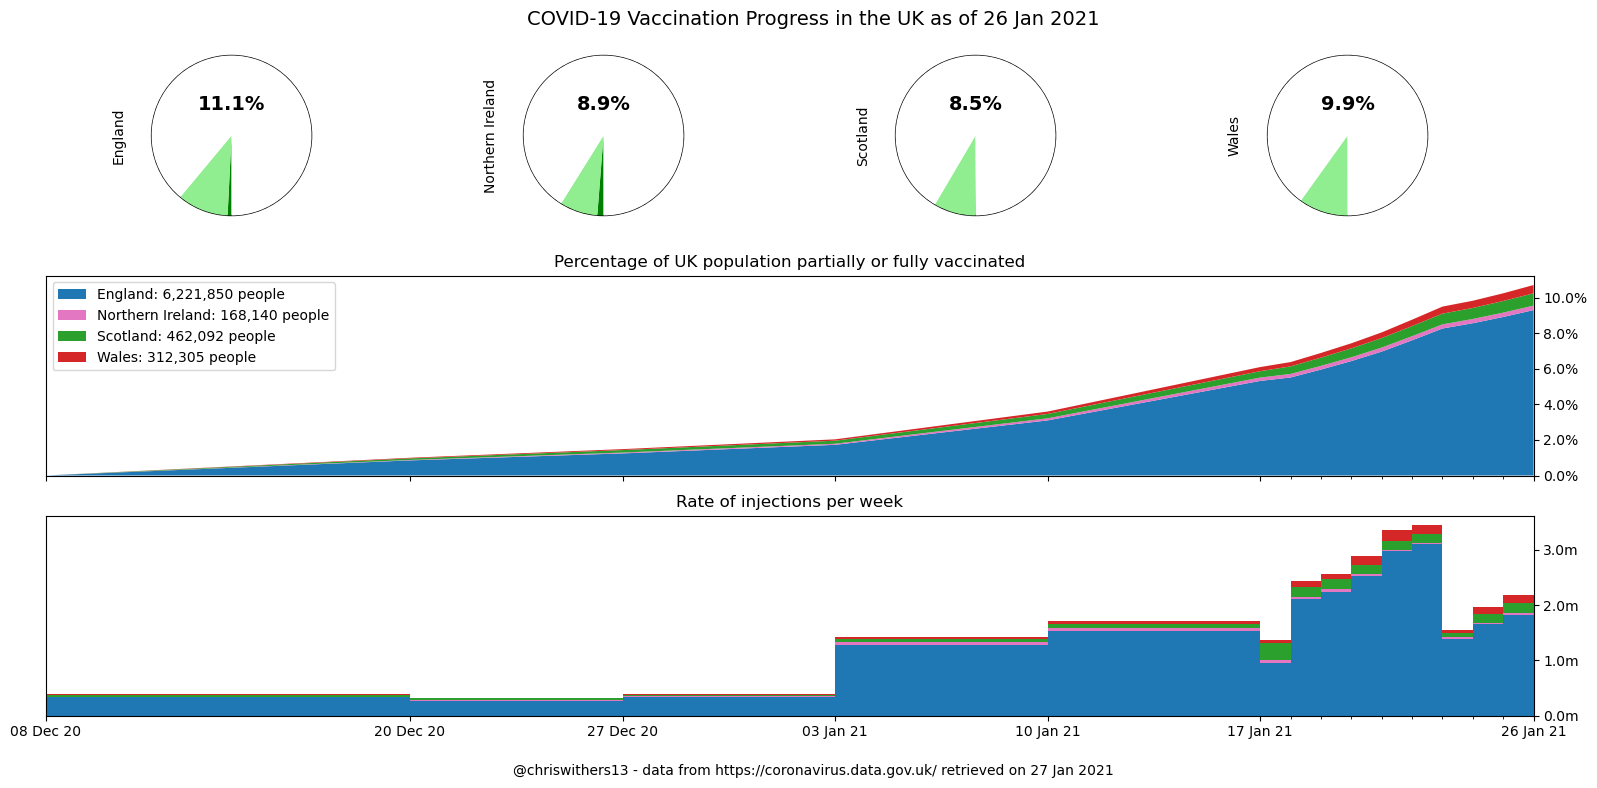

In [26]:
results = vaccination_dashboard()
display(results)
f"{results['any'].sum():,.0f}"

In [27]:
vaccination_corrections()

In [28]:
download(nation, nation, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/nation_2021-01-27.csv')

In [29]:
download(region, region, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/region_2021-01-27.csv')

In [30]:
download(ltla, ltla, *standard_metrics, release=release)

PosixPath('/Users/chris/coronavirus/data/ltla_2021-01-27.csv')

In [4]:
if is_msoa_data_ready():
    path = download(msoa, msoa, new_cases_sum, new_cases_rate, new_cases_change, 'release', release=release)
    display(path)
    check_path(path)

today: 2021-01-27, release: 2021-01-27 16:20:31.150043+00:00, msoa: 2021-01-27 16:49:25+00:00


PosixPath('/Users/chris/coronavirus/data/msoa_2021-01-27.csv')